In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN 

import  tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding, SimpleRNN,Bidirectional,LSTM, GRU

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [6]:
pip install WordCloud #World Cloud Use in Visualization Purpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
df=pd.read_csv('/content/train.csv',error_bad_lines=False, engine="python")

<ipython-input-8-204812504b41>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/train.csv',error_bad_lines=False, engine="python")
Skipping line 810: unexpected end of data


In [9]:
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [10]:
df = df.dropna()

In [11]:
import nltk

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
stlist=stopwords.words("english")
stlist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
def preprocess_text(text):
    text=text.lower()
    tokens=word_tokenize(text)
    cleantokens=[i for i in tokens if i.isalpha()]
    cleantokens1=[i for i in cleantokens if i not in stlist]
    lm=WordNetLemmatizer()
    lemm_tokens=[lm.lemmatize(i)for i in cleantokens1]
    return ' '.join(lemm_tokens)

In [18]:
pos=' '.join(df[df["label"]==1]["text"])

In [19]:
neg=' '.join(df[df["label"]==0]["text"])

In [20]:
pos

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [21]:
neg

Output hidden; open in https://colab.research.google.com to view.

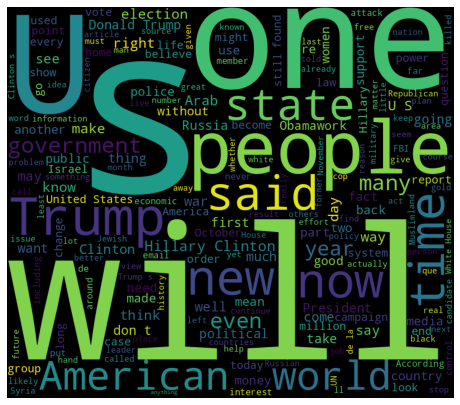

In [22]:
wc=WordCloud(width=800,height=700,min_font_size=10)
wc.generate(pos)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

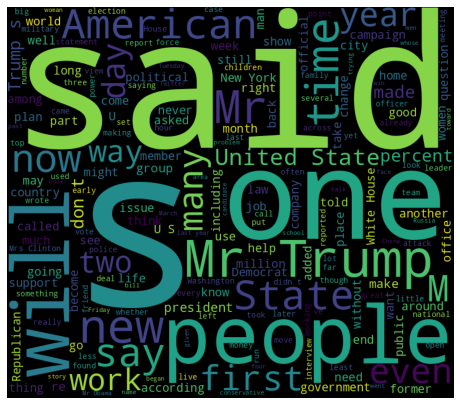

In [23]:
wc=WordCloud(width=800,height=700,min_font_size=10)
wc.generate(neg)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [24]:
x=df['text']
y=df['label']

In [25]:
print(x)

0      House Dem Aide: We Didn’t Even See Comey’s Let...
1      Ever get the feeling your life circles the rou...
2      Why the Truth Might Get You Fired October 29, ...
3      Videos 15 Civilians Killed In Single US Airstr...
4      Print \nAn Iranian woman has been sentenced to...
                             ...                        
802    WASHINGTON  —   During the 2016 campaign, Dona...
803    KUALA LUMPUR, Malaysia  —   A man from North K...
804    Home › HEALTH › SURGEONS ADMIT THAT MAMMOGRAPH...
806    By wmw_admin on November 3, 2016 Nick Gutterid...
807    One “brutally honest” Oscar voter says   nomin...
Name: text, Length: 702, dtype: object


In [26]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
802    0
803    0
804    1
806    1
807    0
Name: label, Length: 702, dtype: int64


In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
tok= Tokenizer()
tok.fit_on_texts(xtrain)

In [29]:
voc=tok.index_word
print(voc)

{1: 'the', 2: 'to', 3: 'of', 4: 'and', 5: 'a', 6: 'in', 7: 'that', 8: 'is', 9: 'for', 10: '”', 11: 'on', 12: 'it', 13: 'he', 14: 'as', 15: 'with', 16: 'was', 17: 'said', 18: 'by', 19: 'be', 20: 'are', 21: 'his', 22: 'at', 23: 'have', 24: 'has', 25: 'mr', 26: 'from', 27: 'not', 28: 'this', 29: 'an', 30: 'but', 31: 'who', 32: 'i', 33: 'they', 34: 'trump', 35: '—', 36: 'you', 37: 'about', 38: 'will', 39: 'had', 40: 'their', 41: 'or', 42: 'she', 43: 'more', 44: 'her', 45: 'been', 46: 'we', 47: 'one', 48: 'would', 49: 'all', 50: 'which', 51: 'people', 52: 'were', 53: 'what', 54: 'like', 55: 'when', 56: 'if', 57: 'new', 58: 'out', 59: 'than', 60: 'its', 61: 'so', 62: 'no', 63: 'up', 64: 'can', 65: 'there', 66: 'also', 67: 'after', 68: 'president', 69: 'just', 70: 'clinton', 71: 'into', 72: 'over', 73: 'other', 74: 'some', 75: 'them', 76: 'time', 77: 'now', 78: 'do', 79: 'him', 80: 'our', 81: 'states', 82: 'us', 83: 'could', 84: 'state', 85: 'most', 86: 'many', 87: 'because', 88: 'years', 89:

In [30]:
voclen=len(voc)

In [31]:
trainseq=tok.texts_to_sequences(xtrain)

In [32]:
print(trainseq)

[[11388, 2558, 16, 1776, 54, 5, 128, 11389, 2670, 6, 44, 16003, 3093, 11, 5, 16004, 16005, 2789, 2559, 6, 16006, 11390, 5202, 12, 16, 76, 2, 3267, 153, 577, 608, 365, 407, 44, 29, 16007, 2327, 16008, 728, 11391, 118, 119, 2, 1, 299, 10, 1, 3268, 2790, 5, 2942, 430, 42, 695, 6, 1054, 4, 12, 885, 37, 1244, 2430, 36, 12, 8, 37, 2671, 103, 16, 265, 5, 537, 37, 1910, 14, 5, 1483, 16009, 10, 42, 17, 2063, 1278, 2, 140, 6534, 41, 27, 2328, 15, 178, 10, 47, 2064, 129, 7, 37, 47, 3, 1, 85, 977, 224, 6, 1, 109, 1, 649, 3, 455, 886, 4, 5, 1911, 3, 5, 97, 899, 7, 1912, 2, 16010, 9, 9058, 176, 6, 1245, 30, 3, 49, 1, 202, 11, 44, 1070, 50, 48, 9059, 85, 16011, 1910, 8, 22, 1, 299, 44, 57, 473, 139, 1910, 1392, 7527, 118, 178, 47, 358, 22, 5, 9060, 4017, 8, 5, 343, 2, 2672, 12, 8, 66, 5203, 5, 16012, 169, 2226, 7, 3269, 11391, 16013, 22, 11392, 4, 29, 5772, 16014, 3, 5, 16015, 2560, 132, 50, 42, 695, 58, 886, 4, 3497, 557, 103, 164, 2, 16016, 80, 16017, 15, 1910, 10, 17, 147, 2558, 3747, 6, 5, 16018,

In [33]:
doclen=[]
for i in trainseq:
  doclen.append(len(i))

print(doclen)

[1324, 1037, 6, 706, 1075, 977, 581, 1078, 559, 1326, 136, 564, 0, 526, 770, 2131, 704, 320, 1057, 1027, 618, 174, 402, 1491, 1076, 213, 214, 1118, 565, 1214, 871, 1363, 207, 608, 1404, 20, 356, 401, 16, 901, 505, 445, 422, 848, 1206, 481, 976, 156, 449, 829, 170, 1627, 171, 1468, 486, 551, 197, 59, 38, 32, 1120, 418, 1175, 208, 841, 2395, 219, 457, 766, 523, 357, 1182, 1089, 1210, 863, 500, 372, 1538, 916, 386, 512, 1164, 980, 1037, 1212, 835, 213, 372, 1162, 674, 418, 1281, 393, 207, 770, 1624, 788, 91, 840, 79, 453, 605, 33, 243, 32, 153, 826, 1450, 1126, 1561, 163, 292, 370, 2217, 1927, 242, 329, 1456, 119, 1286, 884, 474, 221, 164, 954, 290, 359, 903, 959, 1528, 432, 448, 799, 1576, 1158, 900, 457, 3025, 443, 770, 2283, 209, 1569, 828, 1466, 127, 206, 1488, 236, 780, 1432, 690, 1170, 80, 1006, 865, 179, 1365, 874, 0, 957, 60, 372, 147, 347, 687, 815, 534, 1293, 170, 726, 570, 2407, 32, 239, 215, 255, 527, 501, 402, 1779, 1302, 270, 362, 488, 719, 347, 1283, 1021, 239, 1948, 111, 5

In [34]:
max(doclen)

7992

In [35]:
np.quantile(doclen,0.99)

5173.50000000002

In [36]:
max_length=4269
trainmatrix=sequence.pad_sequences(trainseq,maxlen=max_length)

In [37]:
trainmatrix

array([[    0,     0,     0, ...,    42,  3100,    75],
       [    0,     0,     0, ...,  2233,  1317,    10],
       [    0,     0,     0, ...,  1781,  7559, 16109],
       ...,
       [    0,     0,     0, ...,    11,    86,  1407],
       [    0,     0,     0, ...,     5,  1110,    10],
       [    0,     0,     0, ...,  7267,     6,  3734]], dtype=int32)

In [38]:
testseq=tok.texts_to_sequences(xtest)
testmatrix=sequence.pad_sequences(testseq,maxlen=max_length)

LSTM

In [ ]:
model5=Sequential()
model5.add(Embedding(input_dim=voclen+1,
          output_dim=100,
          input_length=max_length,
          mask_zero=True))

model5.add(LSTM(32))
model5.add(Dense(16,activation="relu"))
model5.add(Dense(8,activation="relu"))
model5.add(Dense(1,activation="sigmoid"))

model5.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model5.fit(trainmatrix,ytrain,epochs=5,batch_size=40)
ypred=model5.predict(testmatrix)
ypred=np.where(ypred>=0.5,1,0)
print(classification_report(ytest,ypred))

Epoch 1/5
13/13 [==============================] - 168s 12s/step - loss: 0.6859 - accuracy: 0.5580
Epoch 2/5
13/13 [==============================] - 153s 12s/step - loss: 0.6387 - accuracy: 0.5601
Epoch 3/5
13/13 [==============================] - 153s 12s/step - loss: 0.4765 - accuracy: 0.6904
Epoch 4/5
13/13 [==============================] - 150s 12s/step - loss: 0.3372 - accuracy: 0.9796
Epoch 5/5
7/7 [==============================] - 6s 688ms/step
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       127
           1       0.90      0.63      0.74        84

    accuracy                           0.82       211
   macro avg       0.85      0.79      0.80       211
weighted avg       0.84      0.82      0.82       211



GRU

In [ ]:
model6=Sequential()
model6.add(Embedding(input_dim=voclen+1,
          output_dim=100,
          input_length=max_length,
          mask_zero=True))

model6.add(GRU(32))
model6.add(Dense(16,activation="relu"))
model6.add(Dropout(0.2))
model6.add(Dense(8,activation="relu"))
model6.add(Dense(1,activation="sigmoid"))

model6.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model6.fit(trainmatrix,ytrain,epochs=5,batch_size=32)
ypred=model6.predict(testmatrix)
ypred=np.where(ypred>=0.5,1,0)
print(classification_report(ytest,ypred))

Multi-layer RNN

In [ ]:
model7=Sequential()
model7.add(Embedding(input_dim=voclen+1,
          output_dim=100,
          input_length=max_length,
          mask_zero=True))
model7.add(SimpleRNN(32,return_sequences=True))
model7.add(SimpleRNN(32))
model7.add(Dense(16,activation="relu"))
model7.add(Dropout(0.2))
model7.add(Dense(8,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))
model7.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model7.fit(trainmatrix,ytrain,epochs=5,batch_size=128)
ypred=model7.predict(testmatrix)
ypred=np.where(ypred>=0.5,1,0)
print(classification_report(ytest,ypred))

Bidirectional

In [ ]:
model8=Sequential()
model8.add(Embedding(input_dim=voclen+1,
          output_dim=100,
          input_length=max_length,
          mask_zero=True))
model8.add(Bidirectional(SimpleRNN(32)))
model8.add(Dense(16,activation="relu"))
model8.add(Dense(8,activation="relu"))
model8.add(Dense(1,activation="sigmoid"))
model8.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model8.fit(trainmatrix,ytrain,epochs=6,batch_size=32)
ypred1=model8.predict(testmatrix)
ypred1=np.where(ypred>=0.5,1,0)
print(classification_report(ytest,ypred1))

RNN

In [ ]:
model9=Sequential()
model9.add(Embedding(input_dim=voclen+1,
          output_dim=100,
          input_length=max_length,
          mask_zero=True))
model9.add(SimpleRNN(32))
model9.add(Dense(16,activation="relu"))
model9.add(Dense(8,activation="relu"))
model9.add(Dense(1,activation="sigmoid"))
model9.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model9.fit(trainmatrix,ytrain,epochs=5,batch_size=32)
ypred=model9.predict(testmatrix)
ypred=np.where(ypred>=0.5,1,0)
print(classification_report(ytest,ypred))